Важная ремарка: я решила воспользоваться так же Pycaret - библиотекой с низким кодом с открытым исходным кодом на языке Python, цель которой - сократить или циклично провести эксперимент по машинному обучению. По сравнению с другими библиотеками с открытым исходным кодом Pycaret является альтернативой с низким кодом, которая может использоваться для сложных задач машинного обучения с небольшим количеством строк кода. Pycaret прост и удобен в использовании. Все операции в Pycaret автоматически включаются только в конвейере, который скоро будет готов к развертыванию. Pycaret, по сути, представляет собой набор из нескольких библиотек и фреймворков в Python, таких как scikit-learn, XGBoost, Microsoft LightGMB, spaCy и многих других.

Правильно применять эту библиотеку мне помог мануал на сайте pycaret.org

## Установка Pycaret

In [ ]:
pip install pycaret

## Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
from pycaret.classification import *

In [7]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
display(train.head())
display(test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Создание модели
Мы не будем иметь дело с отсутствующими данными. Pycaret автоматически заполняет отсутствующие данные, для числовых столбцов нулевые значения заполняются средним значением столбца, для категориальных столбцов заполнение выполняется с наиболее распространенным значением столбца. Pycaret также выполняет одно "горячее соединение" автоматически. Чтобы проверить все параметры, которые могут быть переданы в настройке: pycaret.org/preprocessing/

## Настройка Pycare

In [9]:
model = setup(data=train, target='Survived', 
                #Pycaret tem a possibilidade de excluir colunas no modelo
                ignore_features = ['Name','Cabin','PassengerId', 'Ticket'], session_id=123,
                silent=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### Сравниваем
Эта функция обучает и сравнивает общие метрики, используя перекрестную проверку в k-кратном порядке, для всех моделей, доступных в импортированной библиотеке. Используемые метрики:

Классификация: Accuracy, AUC, Recall, Precision, F1, Kappa

In [10]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.823400,0.851200,0.702700,0.813400,0.751400,0.616100
1,Gradient Boosting Classifier,0.817000,0.848300,0.706900,0.798000,0.746900,0.604800
2,Light Gradient Boosting Machine,0.813800,0.835700,0.702700,0.790700,0.741300,0.597100
3,Logistic Regression,0.812000,0.853400,0.732200,0.766500,0.745100,0.597200
4,Extreme Gradient Boosting,0.808900,0.832000,0.669400,0.796100,0.723500,0.580800
5,Ridge Classifier,0.800800,0.000000,0.703100,0.758400,0.726700,0.571100
6,Ada Boost Classifier,0.800800,0.840400,0.744900,0.741300,0.739900,0.579000
7,Linear Discriminant Analysis,0.800800,0.848600,0.703100,0.758400,0.726700,0.571100
8,Random Forest Classifier,0.797700,0.832100,0.706500,0.751700,0.725700,0.566000
9,Extra Trees Classifier,0.772100,0.822400,0.690400,0.710100,0.698000,0.515500


# Создание модели
Модель с наилучшим результатом получилась с «CatBoost Classifier», мы также создадим модель «Gradient Boosting Classifier».

In [11]:
cat = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8254,0.8884,0.7500,0.7826,0.7660,0.6268
1,0.8730,0.7970,0.7917,0.8636,0.8261,0.7264
2,0.7778,0.8996,0.6250,0.7500,0.6818,0.5132
3,0.8548,0.8874,0.6522,0.9375,0.7692,0.6683
4,0.7419,0.7346,0.5417,0.7222,0.6190,0.4299
5,0.8387,0.8279,0.7083,0.8500,0.7727,0.6493
6,0.8871,0.8904,0.7917,0.9048,0.8444,0.7565
7,0.8226,0.8640,0.7917,0.7600,0.7755,0.6289
8,0.7581,0.8575,0.5833,0.7368,0.6512,0.4698
9,0.8548,0.8651,0.7917,0.8261,0.8085,0.6917


In [12]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8730,0.8723,0.7917,0.8636,0.8261,0.7264
1,0.8730,0.8226,0.7917,0.8636,0.8261,0.7264
2,0.7302,0.8771,0.6667,0.6400,0.6531,0.4324
3,0.8387,0.9030,0.6522,0.8824,0.7500,0.6349
4,0.7581,0.7566,0.5417,0.7647,0.6341,0.4612
5,0.7903,0.8311,0.6667,0.7619,0.7111,0.5477
6,0.8871,0.8777,0.7917,0.9048,0.8444,0.7565
7,0.8387,0.8191,0.7500,0.8182,0.7826,0.6548
8,0.7742,0.8191,0.6250,0.7500,0.6818,0.5090
9,0.8065,0.9046,0.7917,0.7308,0.7600,0.5983


Настраиваем гиперпараметры модели машинного обучения

In [13]:
tuned_cat = tune_model ('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8571,0.9022,0.7917,0.8261,0.8085,0.6947
1,0.8413,0.8194,0.7917,0.7917,0.7917,0.6635
2,0.7619,0.8942,0.6250,0.7143,0.6667,0.4828
3,0.8710,0.9075,0.6957,0.9412,0.8000,0.7079
4,0.7742,0.7544,0.5833,0.7778,0.6667,0.5011
5,0.8065,0.8136,0.7500,0.7500,0.7500,0.5921
6,0.8710,0.8761,0.7917,0.8636,0.8261,0.7238
7,0.7903,0.8586,0.7500,0.7200,0.7347,0.5615
8,0.7742,0.8399,0.6250,0.7500,0.6818,0.5090
9,0.8226,0.8958,0.7917,0.7600,0.7755,0.6289


In [16]:
## После завершения настройки и создания модели мы сохранили готовую модель.
final_gbc = finalize_model(gbc)

# Результаты 
График результатов недоступен для модели catboost, поэтому мы будем использовать классификатор повышения градиента.

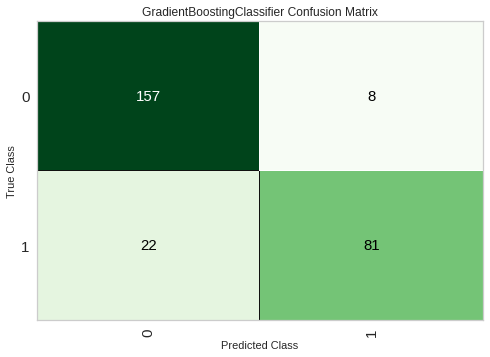

In [17]:
plot_model(estimator=final_gbc, plot='confusion_matrix')

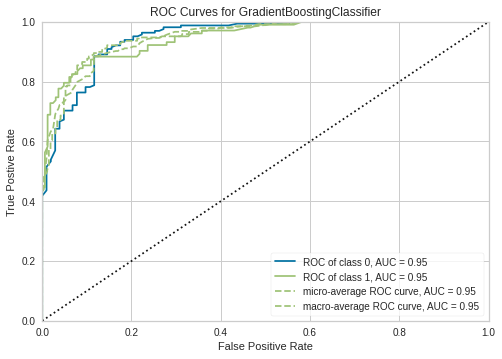

In [18]:
plot_model(estimator=final_gbc, plot='auc')

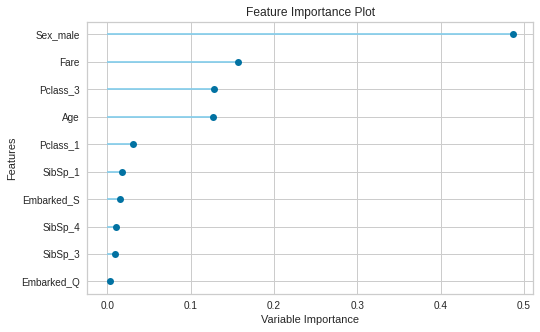

In [19]:
plot_model(estimator=final_gbc, plot='feature')

## Резюме:

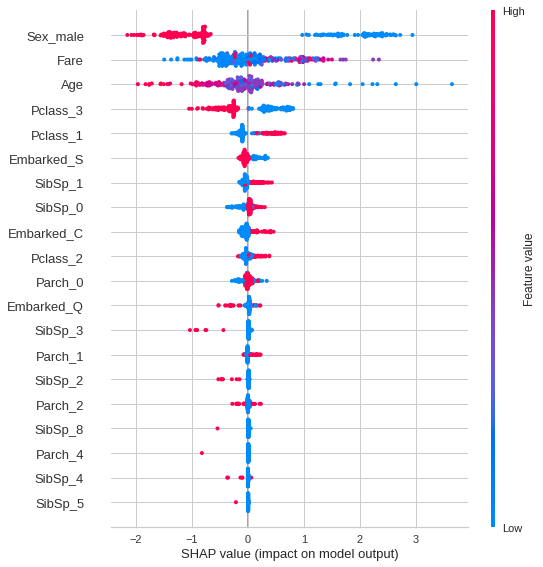

In [20]:
interpret_model(cat)

### Чтобы узнать больше, тестируем модель

In [21]:
ids = test['PassengerId']
test.drop(['PassengerId', 'Name','Ticket', 'Cabin'], axis=1, inplace=True)

In [22]:
pred = predict_model(final_gbc, data=test)

Прогноз первой модели:

In [23]:
a = pd.DataFrame({'PassengerId': ids,
                 'Survived': pred['Label']})
a.to_csv('primeiro_modelo.csv', index=False)